In [1]:
# 06_pca_tsne (n)
# 1. Dla danych z zadania z 05 wykonaj:
# PCA dla n_components = [2 ,4, 6] i wyświetl wartość explained_variance_ratio_
# utwórz wykres typu "słupkowego" dla wszystkich n_components_
# oblicz n_components_, które zachowają wariancję na poziomie 95%
# 2. Dla datasetu z projektu:
# utwórz scatter plot, korzystając z:
# t-SNE*
# PCA + t-SNE (skorzystaj z Pipeline lub make_pipeline)
# porównaj czas oraz "jakość" powyższych wykresów
# 3. Zaimplementuj GridsearchCV oraz kPCA dla danych z pkt. 2:
# znajdź najlepszy kernel oraz parametr gamma (zacznij od np.linespace(0.03, 0.05, 5))
# wybierz dowolny klasyfikator

# * Jeżeli czas utworzenia wykresu z wykorzystaniem t-SNE jest za długi,  zmniejsz dataset (wybierz losowe obserwacje)

# Rozwiązanie prześlij jako printscreen (jpg, pdf).
# Nazwa pliku (bez polskich znaków):

# Nazwisko_Imie_06_niestacj.jpg

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [4]:
X = mnist["data"]
y = mnist["target"]
X.shape

(70000, 784)

In [5]:
img = X[5]
img = img.reshape(28, 28)

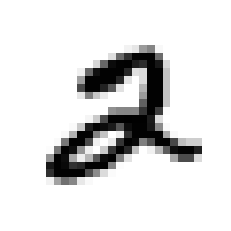

2


In [7]:
plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

print(y[5])

In [8]:
pca_2 = PCA(n_components=4)
pca_2.fit(X)

PCA(n_components=4)

In [9]:
expl_ratio_2 = pca_2.explained_variance_ratio_
expl_ratio_2

array([0.09746116, 0.07155445, 0.06149531, 0.05403384])

In [10]:
print(np.cumsum(expl_ratio_2))
print(np.sum(expl_ratio_2))

[0.09746116 0.16901561 0.23051091 0.28454476]
0.2845447594573192


In [12]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [14]:
d = np.argmax(cumsum >= 0.95) + 1
# print(cumsum)
# print(d)

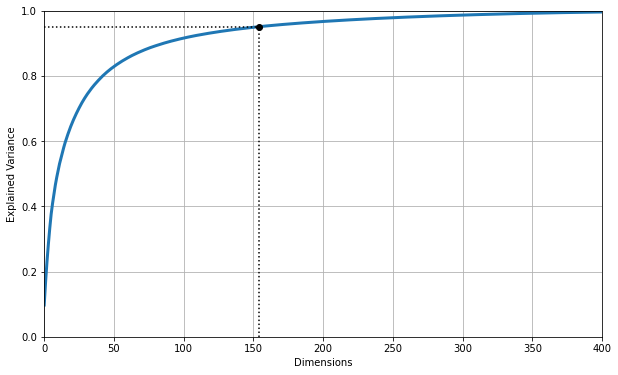

In [16]:
plt.figure(figsize=(10,6))

plt.plot(cumsum, linewidth=3)

bplt.axis([0, 400, 0 , 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.plot([d,d], [0, 0.95], "k:")
plt.plot([0,d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
           
plt.grid()
plt.show()

In [18]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(X)

pca.n_components_

154

In [20]:
np.sum(pca.explained_variance_ratio_)

0.9503499702078613

# 1

In [32]:
from sklearn.datasets import load_wine
import pandas as pd

In [3]:
# load and return the diabetes dataset (classification).
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
# data, target assignments
X, y = wine.data, wine.target

In [25]:
elements = [2, 4, 6]
ele_sum = []

In [27]:
for ele in elements:
    pca = PCA(n_components=ele)
    pca.fit(X)
    
    expl_ratio = pca.explained_variance_ratio_
    print(expl_ratio)
    
    expl_ratio_sum = sum(expl_ratio)
    ele_sum.append(expl_ratio_sum)

[0.09746116 0.07155445]
[0.09746116 0.07155445 0.06149531 0.05403384]
[0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227]


In [40]:
df_to_plot = pd.DataFrame(ele_sum, index=elements, columns=["expl_ratio"])
df_to_plot.index.name = "n. of components"

<AxesSubplot:xlabel='n. of components'>

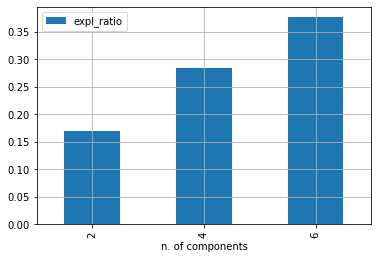

In [45]:
df_to_plot.plot(kind="bar", grid=True)

In [46]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(X)

pca.n_components_

154

# 2

https://drive.google.com/drive/folders/1kTundijeYX-E-ze4Dm5DqEVsH1o1YJf9?usp=sharinghttps://drive.google.com/drive/folders/1kTundijeYX-E-ze4Dm5DqEVsH1o1YJf9?usp=sharing

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [51]:
test_data = pd.read_csv("project_data/test_data.csv", header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,179.171,102.366,-90318.459,-76354.589,-30178.335,617.269,-1282.834,-1096.950,171.635,-19.206,...,-43.192,-224.675,12.324,232.965,152.504,122.130,107.225,565.803,537.527,-60.706
1,106.673,-63.988,14393.611,-23722.852,-9392.469,449.456,-562.289,-536.924,-1162.814,168.002,...,-390.906,-49.040,94.748,-168.545,612.119,-216.957,-5.355,-315.510,-145.489,-1254.983
2,-4.873,-205.671,-28555.498,7933.658,4245.138,1603.993,-914.152,1449.421,-700.017,460.350,...,-0.575,162.502,178.716,-403.328,504.106,179.730,-186.519,481.705,-404.409,-896.072
3,-190.940,195.398,7372.475,-57092.149,21447.785,508.022,1256.862,1498.347,569.061,16.259,...,19.651,-18.126,104.865,336.881,1799.097,359.658,102.798,242.973,-536.491,316.552
4,-235.533,332.318,47801.547,-48097.081,-8387.428,-1062.866,-511.930,908.649,-424.938,322.100,...,-302.825,-358.884,-94.971,109.459,189.027,-990.600,125.996,-1309.715,-510.876,768.972


In [55]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])